In [1]:
##导入包
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']  
mpl.rcParams['axes.unicode_minus']=False   

In [2]:
##数据导入
data=pd.read_excel('C:\\Users\\11525\\Desktop\\构建投资组合的五只股票数据（2016-2018）.xlsx',sheet_name='Sheet1',header=0,index_col=0)

In [3]:
##数据清洗
data.head()

,上海机场,宝钢股份,海通证券,工商银行,中国石油
日期,,,,,
2016-01-04,28.27,5.23,14.28,4.45,8.13
2016-01-05,28.76,5.43,14.33,4.47,8.07
2016-01-06,29.50,5.97,14.58,4.51,8.31
2016-01-07,27.99,5.38,13.23,4.43,7.83
2016-01-08,28.03,5.92,13.51,4.46,7.99


<AxesSubplot:xlabel='日期'>

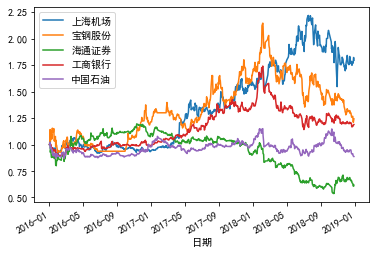

In [4]:
## 归一：第一行不动，第二行除以第三行，第三行除以第一行，大于1股票价格涨的，反之跌
data1=data/data.iloc[0]
data1.plot()

In [5]:
##做增长率，今天相对于昨天的，再对增长率取自然对数
R=np.log(data/data.shift(1)) #R收益率
R=R.dropna()## 去除空值

array([[<AxesSubplot:title={'center':'上海机场'}>,
        <AxesSubplot:title={'center':'宝钢股份'}>],
       [<AxesSubplot:title={'center':'海通证券'}>,
        <AxesSubplot:title={'center':'工商银行'}>],
       [<AxesSubplot:title={'center':'中国石油'}>, <AxesSubplot:>]],
      dtype=object)

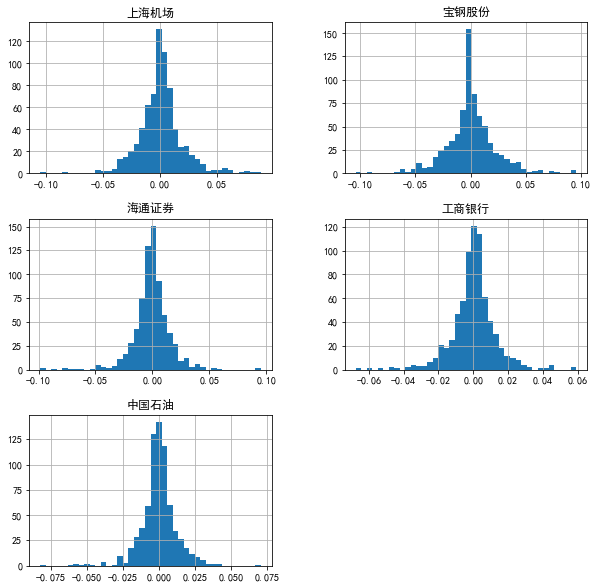

In [6]:
##画每天收益率的直方图
R.hist(bins=40,figsize=(10,10)) ##(bins 字体宽窄，figsize字体字号)

In [7]:
## 对收益率求得日均值再年化252个交易日，年化收益/年化期望
R_mean=R.mean()*252
## 求标准差/波动率
R_vol= R.std()*np.sqrt(252)

In [8]:
R_vol

上海机场    0.302861
宝钢股份    0.345671
海通证券    0.269000
工商银行    0.200236
中国石油    0.204791
dtype: float64

In [9]:
##以上皆为历史数据含三年每只股票的历史收益率，标准差，期望

In [10]:
##五只股票两两之间的协方差 组合的期望，权重*各自的期望和 组合的方差：权重*期望，协方差矩阵的和
R_cov=R.cov()*252

In [11]:
R_cov

,上海机场,宝钢股份,海通证券,工商银行,中国石油
上海机场,0.091724,0.022705,0.022375,0.014478,0.017292
宝钢股份,0.022705,0.119489,0.042816,0.023992,0.030719
海通证券,0.022375,0.042816,0.072361,0.021051,0.028913
工商银行,0.014478,0.023992,0.021051,0.040094,0.016621
中国石油,0.017292,0.030719,0.028913,0.016621,0.041939


In [12]:
##由两两之间的协方差可得两两之间的相关系数
R_corr=R.corr()

In [13]:
R_corr

,上海机场,宝钢股份,海通证券,工商银行,中国石油
上海机场,1.000000,0.216880,0.274644,0.238733,0.278804
宝钢股份,0.216880,1.000000,0.460463,0.346625,0.433946
海通证券,0.274644,0.460463,1.000000,0.390828,0.524851
工商银行,0.238733,0.346625,0.390828,1.000000,0.405316
中国石油,0.278804,0.433946,0.524851,0.405316,1.000000


In [14]:
##构建投资组合，可对五只股票随意分配权重，投资组合的特征：期望和标准差　

In [15]:
x = np.random.random(5)#随机生成5个数使用的是np的random函数的random方法，即均匀分布，其他分布也可

In [16]:
weights=x/np.sum(x)#生成这5个权重

In [17]:
weights

array([0.02219078, 0.19739771, 0.0841071 , 0.39122248, 0.30508193])

In [18]:
#求投资组合的特征（期望和标准差）
R_port = np.sum(weights*R_mean) #组合的期望

In [19]:
R_port

0.015946410423149912

In [20]:
vol_port =np.sqrt(np.dot(weights,np.dot(R_cov,weights)))  #组合的标准差 开根协方差矩阵的和（矩阵的每一行的和及每一列的和） 每只股票的协方差矩阵*权重 积 t表示将权重转置列向量

In [21]:
vol_port

0.17800330809502646

In [22]:
## 给定一个期望，无数个权重，无数个组合，无数个期望，无数个点

In [23]:
## 随机生成的权重尽可能多
Rp_list = []
Vp_list = []
for i in np.arange(100000):
    x = np.random.random(5)
    weights = x/sum(x)
    Rp_list.append(np.sum(weights*R_mean))
    Vp_list.append(np.sqrt(np.dot(weights,np.dot(R_cov,weights))))

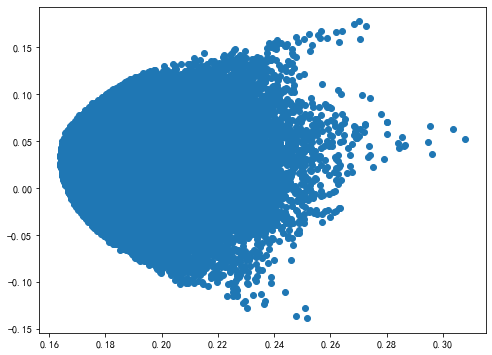

In [24]:
#绘制散点图
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)

In [25]:
#给定期望，求最小方差点
import scipy.optimize as sco #导入求最优化包

In [26]:
def f(w):
    w =np.array(w) #参数权重为数组
    Rp_opt = np.sum(w*R_mean) 
    Vp_opt = np.sqrt(np.dot(w,np.dot(R_cov,w.T))) #二次内积 
    return np.array([Rp_opt,Vp_opt]) #输出期望和方差

In [27]:
def Vmin_f(w):
    return f(w)[1] # 返回f(w)函数的第二个值，即返回值为方差

In [28]:
#求方差的最小值设定约束条件：权重和为1；给定一个特定期望值如10%
#约束条件-一般以字典的键值对表示，type类型：eq表示方程,权重加起来为1：np.sum(x)-1，期望为0.1：f(x)[0]-0.1
cons =({'type':'eq','fun':lambda x:np.sum(x)-1},{"type":"eq","fun":lambda x:f(x)[0]-0.1})

In [29]:
#权重边界位于0和1之间
bnds =((0,1),(0,1),(0,1),(0,1),(0,1))
len(R_mean)*[1.0/len(R_mean),]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [30]:
result = sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method ='SLSQP',bounds=bnds,constraints=cons)

In [31]:
result

     fun: 0.1792784121073968
     jac: array([0.22894758, 0.16720968, 0.1309247 , 0.15967071, 0.11030145])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.34419827e-01, 6.14394569e-02, 7.80625564e-18, 5.22651836e-01,
       8.14888797e-02])

In [32]:
result['x'].round(4)

array([0.3344, 0.0614, 0.    , 0.5227, 0.0815])

In [33]:
result['fun']

0.1792784121073968

In [34]:
 #计算所有期望下的最小方差的值
cons_vmin =({'type':'eq','fun':lambda x:np.sum(x)-1})
result_vmin = sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method ='SLSQP',bounds=bnds,constraints= cons_vmin)

In [35]:
result_vmin

     fun: 0.1636397174233074
     jac: array([0.16377503, 0.16664502, 0.16353986, 0.16363044, 0.163613  ])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.40771975e-01, 1.78893358e-18, 5.05454619e-02, 4.35954019e-01,
       3.72728544e-01])

In [36]:
Rp_vmin = np.sum(R_mean*result_vmin['x'])

In [37]:
Vp_vmin = result_vmin['fun']

In [38]:
Rp_vmin

0.030566677262074824

In [39]:
Vp_vmin

0.1636397174233074

In [40]:
# 绘制有效边界，随机M个期望，计算对应最小方差，产生M个点，连接
Rp_target = np.linspace(-0.15,0.20,100) 
Vp_target = []
for r in Rp_target:
    cons_new =({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x:f(x)[0]-r})
    result_new = sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method ='SLSQP',bounds=bnds,constraints=cons_new)
    Vp_target.append(result_new['fun'])

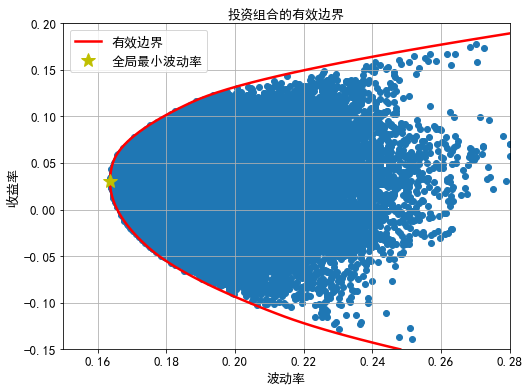

In [41]:
plt.figure(figsize=(8,6)) 
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,"r-",label=u'有效边界',lw=2.5)
plt.plot(Vp_vmin,Rp_vmin,'y*',label=u'全局最小波动率',markersize=14)
plt.xlabel(u"波动率",fontsize=13)
plt.ylabel(u'收益率',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15,0.28)
plt.ylim(-0.15,0.20)
plt.title(u'投资组合的有效边界',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

In [42]:
#最优风险资产组合--夏普比率最大化

In [43]:
#定义夏普比率

In [44]:
def F(w):
    Rf=0.02
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean) 
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov,w.T))) #二次内积
    SR=(Rp_opt-Rf)/Vp_opt
    return np.array([Rp_opt,Vp_opt,SR]) #输出期望和方差

In [45]:
def SRmin_F(w):
    return -F(w)[2]

In [46]:
cons_SR =({'type':'eq','fun':lambda x:np.sum(x)-1})

In [47]:
result_SR=sco.minimize(SRmin_F,len(R_mean)*[1.0/len(R_mean),],method ='SLSQP',bounds=bnds,constraints=cons_SR)

In [48]:
result_SR

     fun: -0.6038744140942413
     jac: array([-0.07421516, -0.07443365,  0.80776136, -0.0741536 ,  0.29886761])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([8.62506325e-01, 1.73485294e-02, 0.00000000e+00, 1.20145146e-01,
       1.18394877e-16])

In [49]:
cons_SR

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [50]:
Rf = 0.02
slope = -result_SR['fun']
Rm =np.sum(R_mean*result_SR['x'])
Vm = (Rm-Rf)/slope

In [51]:
slope

0.6038744140942413

In [52]:
Rm

0.18274404956512064

In [53]:
Vm

0.26949982606768075

In [54]:
##资金配置与可行集切点的可视化
Rp_cml =np.linspace(0.02,0.25)
Vp_cml = (Rp_cml-Rf)/slope

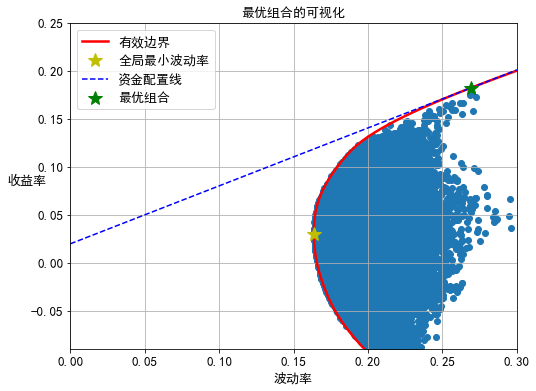

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,"r-",label=u'有效边界',lw=2.5)
plt.plot(Vp_vmin,Rp_vmin,'y*',label=u'全局最小波动率',markersize=14)
plt.plot(Vp_cml,Rp_cml,'b--',label=u'资金配置线',markersize=14)
plt.plot(Vm,Rm,'g*',label=u'最优组合',markersize=14)
plt.xlabel(u"波动率",fontsize=13)
plt.ylabel(u'收益率',fontsize=13,rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.0,0.3)
plt.ylim(-0.09,0.25)
plt.title(u'最优组合的可视化',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

In [56]:
##求beta值
import statsmodels.api as sm

In [57]:
data_index=pd.read_excel('C:\\Users\\11525\\Desktop\\沪深300指数（2016-2018年）.xlsx',sheet_name='Sheet1',header=0,index_col=0)

In [58]:
R_index = np.log(data_index/data_index.shift(1))

In [59]:
R_index =R_index.dropna()

<AxesSubplot:xlabel='日期'>

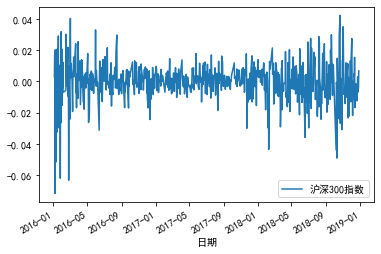

In [60]:
R_index.plot()

In [61]:
R_index_addcons = sm.add_constant(R_index)

In [62]:
model_shjc = sm.OLS(endog=R.iloc[:,0],exog=R_index_addcons)

In [63]:
result_shjc = model_shjc.fit()

In [64]:
print(result_shjc)

In [65]:
result_shjc.params

const      0.000947
沪深300指数    0.749639
dtype: float64